In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import HTML
from matplotlib import animation

In [10]:
p0 = 0.7E6
F = 0.15
c0 = 1614
r0 = 0.042
f0 = 1.7E6
w0 = 2*np.pi*f0
z = np.linspace(0, 1.5*F, 100)
r = np.linspace(-r0, r0, 100000)

Z, R = np.meshgrid(z, r)

In [11]:
def piston_radiator(tau):
    p = p0*np.sin(w0*(tau + r**2/2/c0/F))
    return p

(-800000.0, 800000.0)

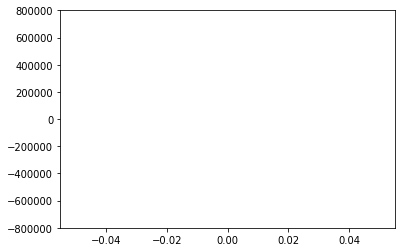

In [12]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
plt.ylim([-0.8E6, 0.8E6])

In [19]:
def init():
    line.set_data([], [])
    return line,

def animate(i):
    pdata = piston_radiator(i/1000000)
    line.set_data(r, pdata)
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=1000000, interval=200, blit=True)

HTML(ani.to_html5_video())

CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '432x288', '-pix_fmt', 'rgba', '-r', '5.0', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/tmp/tmppjl96krj/temp.m4v']' returned non-zero exit status 255.